# Exercise 1. Compute the Jaccard similarity index

**1. Load ‘word_tokenize’ and ‘WordNetLemmatizer’ from nltk, among
other libraries**

In [116]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

**2. Use these pairs for comparison:**

**pair1 = ["What you do defines you","Your deeds define you"]**

**pair2 = ["Once upon a time there lived a king.", "Who is your
queen?"]**

**pair3 = ["He is desperate", "Is he not desperate?"]**

In [117]:
# Define pairs
pair1 = ["What you do defines you", "Your deeds define you"]
pair2 = ["Once upon a time there lived a king.", "Who is your queen?"]
pair3 = ["He is desperate", "Is he not desperate?"]

**3. What is the Jaccard similarity index between pair1[0] and pair1[1]?**

In [118]:
# Download necessary resources
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize text
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return set(tokens)

# Calculate Jaccard Similarity
def jaccard_similarity(text1, text2):
    set1, set2 = preprocess_text(text1), preprocess_text(text2)
    return len(set1.intersection(set2)) / len(set1.union(set2))

print("Set of elements in pair1[0] : ",preprocess_text(pair1[0]))
print("Set of elements in pair1[1] : ",preprocess_text(pair1[1]))

Set of elements in pair1[0] :  {'defines', 'what', 'do', 'you'}
Set of elements in pair1[1] :  {'deed', 'you', 'define', 'your'}


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [119]:
# Compute for pair1
jaccard_pair1 = jaccard_similarity(pair1[0], pair1[1])
print("Jaccard Similarity for pair1:", jaccard_pair1)

Jaccard Similarity for pair1: 0.14285714285714285


# Exercise 2. Compute the Levenshtein distance between "I cannot believe what he said" and "I believe it is not what he said". What does the result mean?

In [120]:
text1 = "I cannot believe what he said"
text2 = "I believe it is not what he said"

from nltk.metrics.distance import edit_distance
# Levenshtein (Edit) Distance
levenshtein_distance = edit_distance(text1, text2)
print("Levenshtein Distance:", levenshtein_distance)

Levenshtein Distance: 15


In [121]:
# Importance of Levenshtein distance
'''A higher Levenshtein distance indicates more differences between the two texts.'''

'A higher Levenshtein distance indicates more differences between the two texts.'

# Exercise 3. Compute the most similar words to 'government' and 'curfew' based on the text.

In [122]:
# Import necessary libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

# Open file in read mode
with open('/content/Europe_Covid.txt','r', encoding = 'utf-8') as file:
    text = file.read().lower()

# Stopwords handling
stop_words = set(stopwords.words('english'))

# Tokenize, and remove stopwords
tokenized_text = [
    [word for word in word_tokenize(sentence) if word.isalpha() and word not in stop_words]
    for sentence in nltk.sent_tokenize(text)
]
# Train the Word2Vec model
model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Find similar words
similar_to_government = model.wv.most_similar('government', topn=5)
similar_to_curfew = model.wv.most_similar('curfew', topn=5)

# Display the results
print(f"Most similar words to 'government' in the given text : \n {similar_to_government}")
print(f"Most similar words to 'curfew' in the given text : \n {similar_to_curfew}")


Most similar words to 'government' in the given text : 
 [('president', 0.313748300075531), ('nations', 0.2542259693145752), ('subject', 0.21318089962005615), ('iron', 0.20250976085662842), ('andalusia', 0.19098053872585297)]
Most similar words to 'curfew' in the given text : 
 [('country', 0.2520885467529297), ('numbers', 0.22662360966205597), ('reporting', 0.20900985598564148), ('regions', 0.19758664071559906), ('together', 0.17866919934749603)]


# Exercise 4. What is the sentiment and subjectivity of the Europe_Covid text?

In [123]:
# Import necessary libaries
from textblob import TextBlob

# Create a TextBlob object
blob = TextBlob(text)

# Get sentiment polarity and subjectivity
sentiment = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity

# Print results
print(f"Sentiment polarity: {sentiment}") # -1 (very negative) to +1 (very positive)
print(f"Subjectivity: {subjectivity}") # 0 (very objective) to 1 (very subjective)

Sentiment polarity: 0.04992382294707877
Subjectivity: 0.3476432095036746


# Exercise 5. WordCloud


**• What are the most frequently used words in the Europe_Covid text?**

In [124]:
# Import necessary libraries
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from collections import Counter
import re

# # Remove non-alphabetic characters
text = re.sub(r'[^a-z\s]', '', text)

# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))
words = [word for word in word_tokenize(text) if word not in stop_words]

# Count word frequencies
word_counts = Counter(words)
most_common_words = word_counts.most_common(10)  # Get the top 10 most frequent words

# Display results
print("Most frequently used words:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

Most frequently used words:
cases: 5
friday: 5
said: 5
new: 5
million: 4
countries: 3
covid: 3
president: 3
according: 3
minister: 3


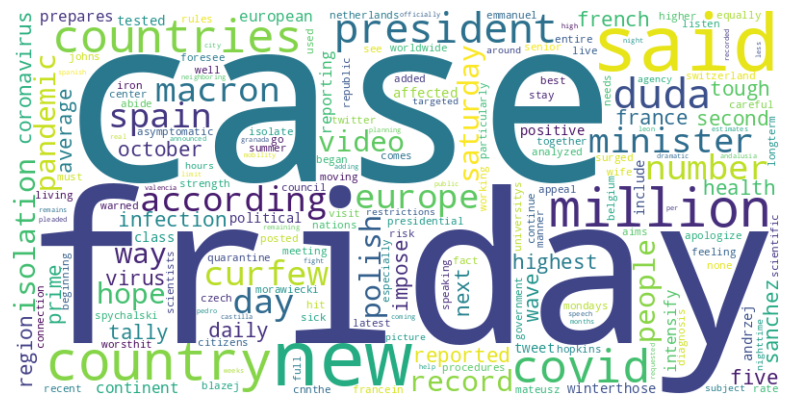

In [125]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tokenize and joining them
filtered_words = ' '.join([word for word in word_tokenize(text) if word not in stop_words])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Exercise 6. Summarize the text in 5 sentences using extractive summarization.

In [126]:
!pip install bert-extractive-summarizer==0.10.1


In [127]:
from summarizer import Summarizer

# Load text
with open('Europe_Covid.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Initialize the BERT-based summarizer and generate a 5-sentence summary
model = Summarizer()
summary = model(text, num_sentences=5)

# Display the summary
print("Summary:")
print(summary)

Summary:
European countries are reporting record numbers of Covid-19 cases as the continent prepares for the pandemic to intensify through winter. However, the fact is that I must isolate. Together with my wife, we abide by the rules of isolation in an iron manner," he said in a video posted on Twitter on Saturday. " I would like to apologize to all of those, who have to go through quarantine procedures in connection to meeting with me in recent days ... I hope none of you get sick." Duda's diagnosis comes as the country reported 13,632 new cases Friday, the highest daily tally since the pandemic began.


# Exercise 7. Use a zero-shot transformer to determine the following categories: informational, query, advocacy, not informational.

In [128]:
!pip install transformers

In [129]:
# Import necessary libraries
from transformers import pipeline

# Initialize zero-shot classifier
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define categories
labels = ["informational", "query", "advocacy", "not informational"]

# Perform classification
result = classifier(text, candidate_labels=labels)

# Display the results
print("Classification results:")
for label, score in zip(result['labels'], result['scores']):
    print(f"{label}: {score:.2f}")


Classification results:
advocacy: 0.36
query: 0.35
informational: 0.25
not informational: 0.04
